In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
output = pd.read_csv('./result/output.csv', index_col=0)

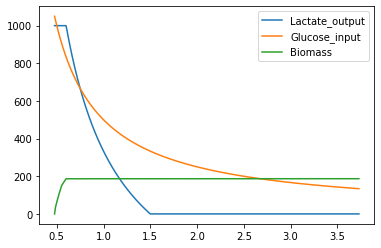

In [12]:
output.plot()

In [18]:
t = output[(output.Lactate_output != 0) & (output.Glucose_input != 0)]
t = (t.T/np.array(t['Biomass'])).T.dropna()

In [20]:
t.T

,1.497006,1.492537,1.488095,1.483680,1.479290,1.474926,1.470588,1.466276,1.461988,1.457726,...,0.480769,0.480307,0.479846,0.479386,0.478927,0.478469,0.478011,0.477555,0.477099,0.476644
Lactate_output,0.006618,0.017311,0.028005,0.038698,0.049392,0.060085,0.070778,0.081472,0.092165,0.102859,...,62.353077,69.281196,77.941345,89.075821,103.921791,124.706150,155.882687,207.843585,311.765374,623.530767
Glucose_input,1.785811,1.791158,1.796505,1.801852,1.807198,1.812545,1.817892,1.823239,1.828585,1.833932,...,64.847200,72.121725,81.214881,92.906082,108.494350,130.317927,163.053290,217.612233,326.730112,654.083774
Biomass,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
t = t.rename(columns={
    'Lactate_output': 'Lactate',
    'Glucose_input': 'Glucose',
    'Biomass': 'Doubling Time'
})
t

,Lactate,Glucose,Doubling Time
1.497006,0.006618,1.785811,1.0
1.492537,0.017311,1.791158,1.0
1.488095,0.028005,1.796505,1.0
1.483680,0.038698,1.801852,1.0
1.479290,0.049392,1.807198,1.0
...,...,...,...
0.478469,124.706150,130.317927,1.0
0.478011,155.882687,163.053290,1.0
0.477555,207.843585,217.612233,1.0
0.477099,311.765374,326.730112,1.0


In [26]:
d = pd.read_csv('../result/slope.csv', index_col=0).T
v = pd.DataFrame(pd.read_excel('../result/lac.xlsx').mean()).T
v.columns = d.columns
slope = pd.concat([d, v])
slope = slope.rename(index={0:'Lactate'})
slope = pd.concat([slope, pd.DataFrame([21.78, 12.8, 16.84], columns=['Doubling Time'] , index=slope.columns).T])

In [27]:
s = slope.drop('Glutamate')

In [15]:
slope = slope/np.array(slope.T['Doubling Time'])
slope

,Control,Clone A,Clone B
Glucose,0.003792,0.003259,0.000829
Glutamate,0.000779,-0.000401,0.000694
Lactate,0.029214,0.291796,0.113808
Doubling Time,1.000000,1.000000,1.000000


In [28]:
g = 10000
for i in t.index:
    mse = (
        (s['Control']['Lactate'] - t.T[i]['Lactate'])**2
        + (s['Control']['Glucose'] - t.T[i]['Glucose'])**2
#         + (s['Control']['Fructose 6-phosphate'] - t.T[i]['Fructose 6-phosphate'])**2
        + (s['Control']['Doubling Time'] - t.T[i]['Doubling Time'])**2)
    if mse < g:
        g = mse
        print(i)

1.497005988023952


In [31]:
g = 10000
for i in t.index:
    mse = (
        (s['Clone A']['Lactate'] - t.T[i]['Lactate'])**2
        + (s['Clone A']['Glucose'] - t.T[i]['Glucose'])**2
#         + (s['Clone A']['Fructose 6-phosphate'] - t.T[i]['Fructose 6-phosphate'])**2
        + (s['Clone A']['Doubling Time'] - t.T[i]['Doubling Time'])**2)
    if mse < g:
        g = mse
        print(i)
        
# t.T[0.5512679162072768]

1.497005988023952
1.492537313432836
1.488095238095238
1.483679525222552
1.4792899408284024
1.4749262536873156
1.4705882352941178
1.4662756598240467
1.4619883040935673
1.4577259475218658
1.4534883720930232
1.4492753623188406
1.4450867052023122
1.4409221902017288
1.4367816091954022
1.4326647564469914
1.4285714285714286
1.4245014245014245
1.4204545454545454
1.4164305949008498
1.4124293785310735
1.4084507042253518
1.404494382022472
1.4005602240896358
1.3966480446927374
1.3927576601671308
1.3888888888888888
1.3850415512465375
1.3812154696132597
1.3774104683195592
1.3736263736263736
1.3698630136986298
1.3661202185792352
1.3623978201634876
1.358695652173913
1.3550135501355014
1.351351351351351
1.3477088948787062
1.3440860215053765
1.3404825737265416
1.3368983957219251
1.3333333333333333
1.3297872340425532
1.326259946949602
1.3227513227513228
1.3192612137203166
1.3157894736842106
1.3123359580052494
1.3089005235602094
1.3054830287206267
1.3020833333333333
1.2987012987012987
1.2953367875647668
1

In [32]:
g = 10000
for i in t.index:
    mse = (
        (s['Clone B']['Lactate'] - t.T[i]['Lactate'])**2
        + (s['Clone B']['Glucose'] - t.T[i]['Glucose'])**2
#         + (s['Clone B']['Fructose 6-phosphate'] - t.T[i]['Fructose 6-phosphate'])**2
        + (s['Clone B']['Doubling Time'] - t.T[i]['Doubling Time'])**2)
    if mse < g:
        g = mse
        print(i)
        
# t.T[0.5512679162072768]

1.497005988023952
1.492537313432836
1.488095238095238
1.483679525222552
1.4792899408284024
1.4749262536873156
1.4705882352941178
1.4662756598240467
1.4619883040935673
1.4577259475218658
1.4534883720930232
1.4492753623188406
1.4450867052023122
1.4409221902017288
1.4367816091954022
1.4326647564469914
1.4285714285714286
1.4245014245014245
1.4204545454545454
1.4164305949008498
1.4124293785310735
1.4084507042253518
1.404494382022472
1.4005602240896358
1.3966480446927374
1.3927576601671308
1.3888888888888888
1.3850415512465375
1.3812154696132597
1.3774104683195592
1.3736263736263736
1.3698630136986298
1.3661202185792352
1.3623978201634876
1.358695652173913
1.3550135501355014
1.351351351351351
1.3477088948787062
1.3440860215053765
1.3404825737265416
1.3368983957219251
1.3333333333333333
1.3297872340425532
1.326259946949602
1.3227513227513228
1.3192612137203166
1.3157894736842106
1.3123359580052494
1.3089005235602094
1.3054830287206267
1.3020833333333333
1.2987012987012987
1.2953367875647668
1

In [94]:
metabo['Control']

Fructose 6-phosphate     0.040300
Citric acid              0.050034
amino_acid              40.580532
PRPP                     1.000000
Name: Control, dtype: float64

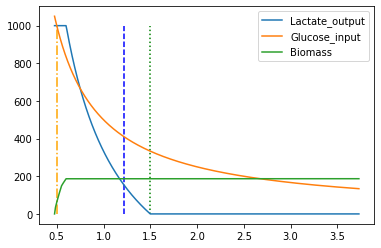

In [38]:
output.plot()
# {'solid', 'dashed', 'dashdot', 'dotted'}
plt.vlines([1.497005988023952], 0.1, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([0.499001996007984], 0.1, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([1.2165450121654502], 0.1, 1000, "blue", linestyles='dashed', label='Clone B')

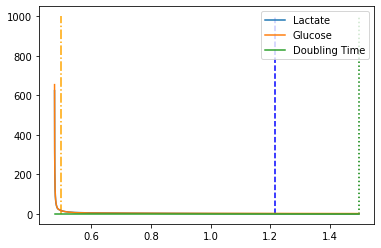

In [39]:
t.plot()
# {'solid', 'dashed', 'dashdot', 'dotted'}
plt.vlines([1.497005988023952], 0.1, 1000, "green", linestyles='dotted', label='Clone A')
plt.vlines([0.499001996007984], 0.1, 1000, "orange", linestyles='dashdot', label='Control')
plt.vlines([1.2165450121654502], 0.1, 1000, "blue", linestyles='dashed', label='Clone B')

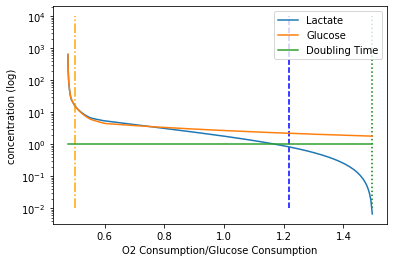

In [41]:
t.plot(logy=True)
# {'solid', 'dashed', 'dashdot', 'dotted'}
plt.ylabel('concentration (log)')
plt.xlabel('O2 Consumption/Glucose Consumption')
plt.vlines([1.497005988023952], 10**-2, 10**4, "green", linestyles='dotted', label='Clone A')
plt.vlines([0.499001996007984], 10**-2, 10**4, "orange", linestyles='dashdot', label='Control')
plt.vlines([1.2165450121654502], 10**-2, 10**4, "blue", linestyles='dashed', label='Clone B')

In [167]:
?pd.DataFrame.plot()

Object `pd.DataFrame.plot()` not found.
